**Neuralmind**

Miguel Angel Acevedo - 2180426

Nelson Delgado - 2181046

Jhon Edinson Caicedo - 2180069
 
Steven Triviño - 2180763

Jesus Valencia - 2180867

# Tensorflow

**¿Que es?** 

Tensorflow es una librería de código libre para Machine Learning (ML). Fue desarrollada por Google para satisfacer las necesidades a partir de redes neuronales artificiales. TensorFlow permite construir y entrenar redes neuronales para detectar patrones y razonamientos usados por los humanos.

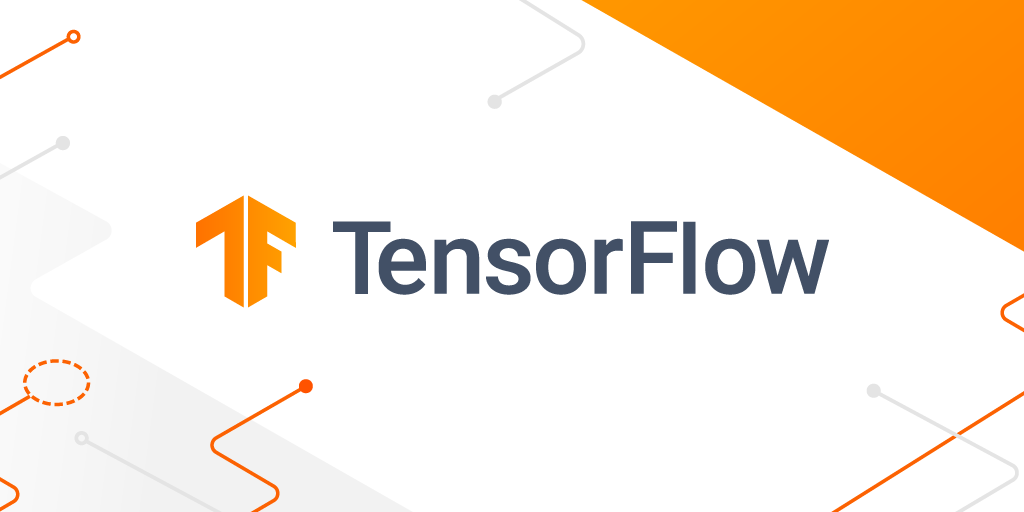

**Origen**

TensorFlow es un sistema de computación numérica de código abierto de Google Cloud. Lo podemos encontrar en numerosos productos de Google Cloud ya que nos permite desarrollar algoritmos inteligentes. Google Cloud es uno de los pioneros en Inteligencia Artificial (IA), aprendizaje automático y Big Data, entre otros. Y TensorFlow nace de uno de los proyectos de Google en estos campos: Google Brain.

**¿Para qué sirve?** 

TensorFlow es una plataforma que facilita la creación e implementación de modelos de aprendizaje automático. Lo que buscamos hoy en día es automatizar cientos de procesos y TensorFlow nos permite llegar a esta automatización. Nos permite crear y entrenar modelos de Aprendizaje Automático con facilidad mediante APIs intuitivas.


# Keras

**¿Que es?**

Keras es una API de aprendizaje profundo escrita en Python, que se ejecuta sobre la plataforma de aprendizaje automático TensorFlow. Fue desarrollado con un enfoque en permitir la experimentación rápida. Ser capaz de pasar de la idea al resultado lo más rápido posible es clave para hacer una buena investigación.


Keras es:

- **Simple, pero no simplista.** Keras reduce la carga cognitiva del desarrollador para que pueda concentrarse en las partes del problema que realmente importan.
- **Flexible:** Keras adopta el principio de revelación progresiva de la complejidad: los flujos de trabajo simples deben ser rápidos y fáciles, mientras que los flujos de trabajo arbitrariamente avanzados deben ser posibles a través de un camino claro que se basa en lo que ya ha aprendido.
- **Potente:** Keras proporciona un rendimiento y una escalabilidad sólidos en la industria: lo utilizan organizaciones y empresas, incluidas la NASA, YouTube o Waymo.

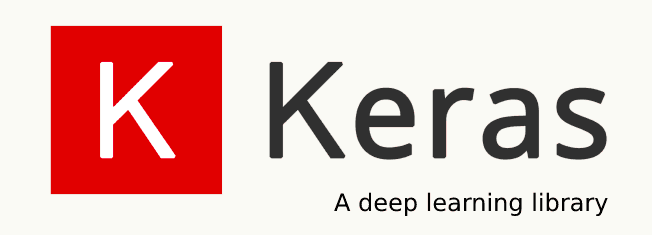

Keras es la API de alto nivel de TensorFlow 2: una interfaz accesible y altamente productiva para resolver problemas de aprendizaje automático, con un enfoque en el aprendizaje profundo moderno. Proporciona abstracciones esenciales y bloques de construcción para desarrollar y enviar soluciones de aprendizaje automático con alta velocidad de iteración.

Keras permite a los ingenieros e investigadores aprovechar al máximo la escalabilidad y las capacidades multiplataforma de TensorFlow 2: puede ejecutar Keras en TPU o en grandes grupos de GPU, y puede exportar sus modelos de Keras para ejecutarlos en el navegador o en un dispositivo móvil. dispositivo.

#Fundamentos de Tensorflow

El nombre de Tensorflow se deriva directamente de su marco principal: **Tensor.** En Tensorflow, todos los cálculos involucran tensores. Un tensor es un vector o matriz de n-dimensiones que representa todos los tipos de datos. Todos los valores de un tensor contienen un tipo de datos idéntico con una forma conocida (o parcialmente conocida).

En TensorFlow, todos los cálculos pasan a través de uno o más tensores. Un tensor es un objeto con tres propiedades:

- Una etiqueta única (nombre)
- Una cota (forma)
- Un tipo de datos (dtype)

Todos los tensores son inmutables como los números y las cadenas de Python: nunca puede actualizar el contenido de un tensor, solo puede crear uno nuevo.



In [ ]:
import tensorflow as tf
# This will be an int32 tensor by default; see "dtypes" below.
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


In [ ]:
# If you want to be specific, you can set the dtype (see below) at creation time
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


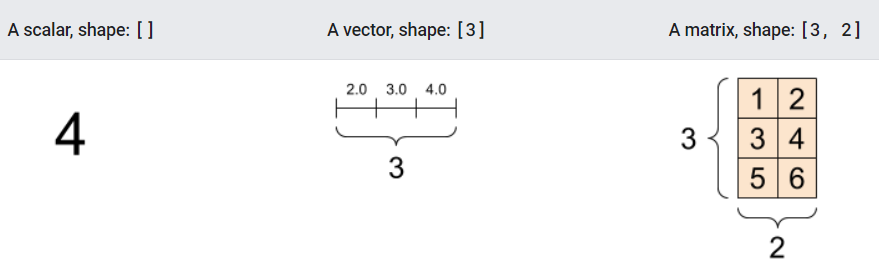

In [ ]:
# There can be an arbitrary number of
# axes (sometimes called "dimensions")
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


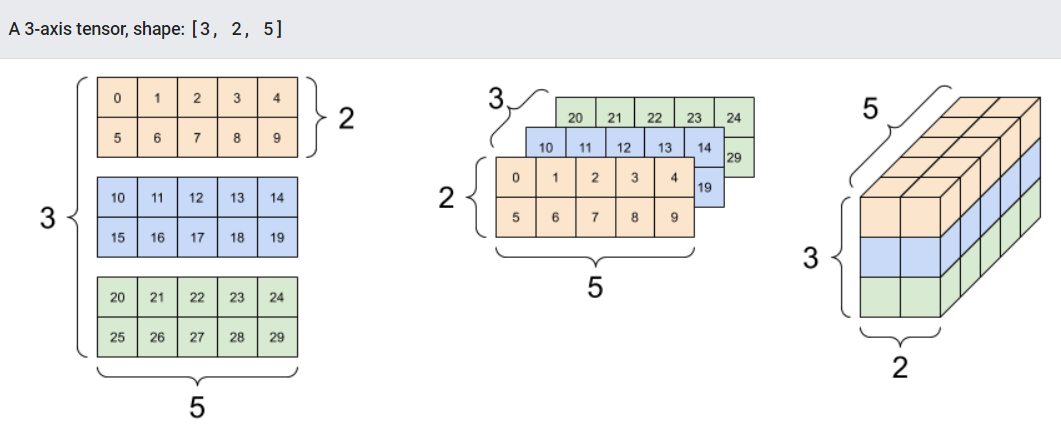

# Ejemplo de una red neuronal con Tensorflow + Keras

##Las compuertas XOR:
Para el ejemplo, utilizaremos las compuertas XOR. Si no las conoces o no las recuerdas, funcionan de la siguiente manera:

Tenemos dos entradas binarias (1 ó 0) y la salida será 1 sólo si una de las entradas es verdadera (1) y la otra falsa (0).

Es decir que de cuatro combinaciones posibles, sólo dos tienen salida 1 y las otras dos serán 0, como vemos aquí:

* XOR(0,0) = 0
* XOR(0,1) = 1
* XOR(1,0) = 1
* XOR(1,1) = 0


###Primero importamos las clases que utilizaremos:
Utilizaremos numpy para el manejo de arrays. De Keras importamos el tipo de modelo Sequential y el tipo de capa Dense que es la “normal”.

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.models import model_from_json

##Creamos los arrays de entrada y salida.
Como se puede ver son las cuatro entradas posibles de la función XOR [0,0], [0,1], [1,0],[1,1] y sus cuatro salidas: 0, 1,1,0.

In [ ]:
# cargamos las 4 combinaciones de las compuertas XOR
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# y estos son los resultados que se obtienen, en el mismo orden
target_data = np.array([[0],[1],[1],[0]], "float32")

###Ahora crearemos la arquitectura de nuestra red neuronal:
Primero creamos un modelo vació de tipo Sequential. Este modelo se refiere a que crearemos una serie de capas de neuronas secuenciales, “una delante de otra”.

Agregamos dos capas Dense con “model.add()”. Realmente serán 3 capas, pues al poner input_dim=2 estamos definiendo la capa de entrada con 2 neuronas (para nuestras entradas de la función XOR) y la primer capa oculta (hidden) de 16 neuronas. Como función de activación utilizaremos “relu” que sabemos que da buenos resultados. Podría ser otra función, esto es un mero ejemplo, y según la implementación de la red que haremos, deberemos variar la cantidad de neuronas, capas y sus funciones de activación.

Y agregamos una capa con 1 neurona de salida y función de activación sigmoid.

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

##Visualización de la red Neuronal

Veamos que hemos hecho hasta ahora:
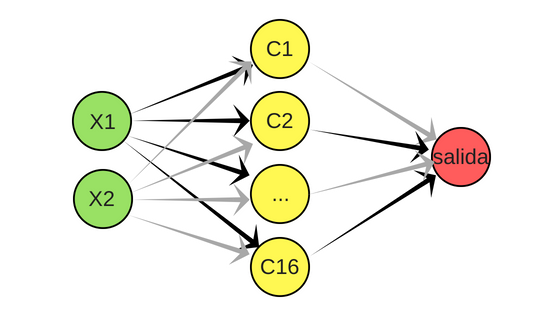

###Antes de de entrenar la red haremos unos ajustes de nuestro modelo:

Con esto indicamos el tipo de pérdida (loss) que utilizaremos, el “optimizador” de los pesos de las conexiones de las neuronas y las métricas que queremos obtener.

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

###Ahora sí que entrenaremos la red:
Indicamos con model.fit() las entradas y sus salidas y la cantidad de iteraciones de aprendizaje (epochs) de entrenamiento. Este es un ejemplo sencillo, pero recuerda que en modelos más grandes y complejos, necesitarán más iteraciones y a la vez será más lento el entrenamiento.


In [ ]:
model.fit(training_data, target_data, epochs=1000, verbose=0)

#Evaluamos y Predecimos


### Primero evaluamos el modelo

Y vemos que tuvimos un 100% de precisión (recordemos lo trivial de este ejemplo).

In [ ]:
scores = model.evaluate(training_data, target_data)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate(training_data, target_data)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1/1 [==============================] - 0s 252ms/step - loss: 0.0159 - binary_accuracy: 1.0000

binary_accuracy: 100.00%
1/1 [==============================] - 0s 46ms/step - loss: 0.0159 - binary_accuracy: 1.0000

binary_accuracy: 100.00%


###Y hacemos las 4 predicciones posibles de XOR, pasando nuestras entradas:

y vemos las salidas 0,1,1,0 que son las correctas.

In [ ]:
print(model.predict(training_data).round())

1/1 [==============================] - 0s 133ms/step
[[0.]
 [1.]
 [1.]
 [0.]]


#Guardar la red y usarla -de verdad-

Si esto fuera un caso real, en el cual entrenamos una red, la ajustamos y obtenemos buenos resultados, ahora deberíamos Guardar esa red ya que esa red óptima, tiene los pesos que estábamos buscando. Sería tonto y lento entrenar cada vez la red antes de “publicar en producción”.

Lo que hacemos es guardar esa red y en OTRO código cargaríamos la red y la utilizamos como si fuera una librería o una funcion que creamos. Pasándole entradas y obteniendo las predicciones.


from keras.models import model_from_json

















###Para guardar y cargar nuestra red, utilizaremos el siguiente código de ejemplo:



In [ ]:
# serializar el modelo a JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serializar los pesos a HDF5
model.save_weights("model.h5")
print("Modelo Guardado!")

Modelo Guardado!


In [ ]:
# cargar json y crear el modelo
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# cargar pesos al nuevo modelo

loaded_model.load_weights("model.h5")
print("Cargado modelo desde disco.")
 

 
# Compilar modelo cargado y listo para usar.
loaded_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])

Cargado modelo desde disco.


In [ ]:
loaded_model.predict(training_data).round() 

1/1 [==============================] - 0s 86ms/step


array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [ ]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

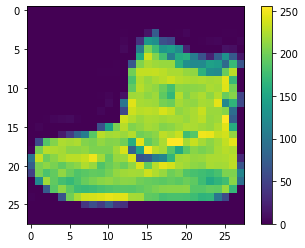

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

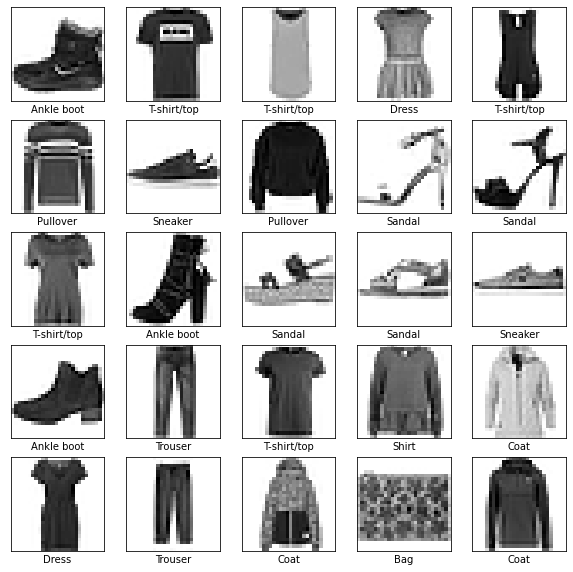

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5016 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3786 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3399 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3139 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2950 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2826 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2711 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2592 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2499 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3345 - accuracy: 0.8846 - 605ms/epoch - 2ms/step

Test accuracy: 0.8845999836921692


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

array([6.8651147e-08, 3.8652064e-07, 4.3475276e-10, 2.3587312e-08,
       4.7881542e-08, 4.2231572e-05, 6.7810715e-06, 7.4353195e-03,
       1.6477643e-06, 9.9251354e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

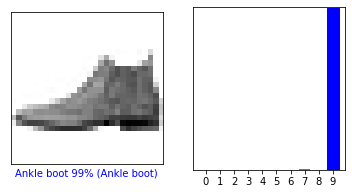

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

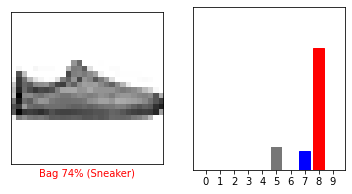

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

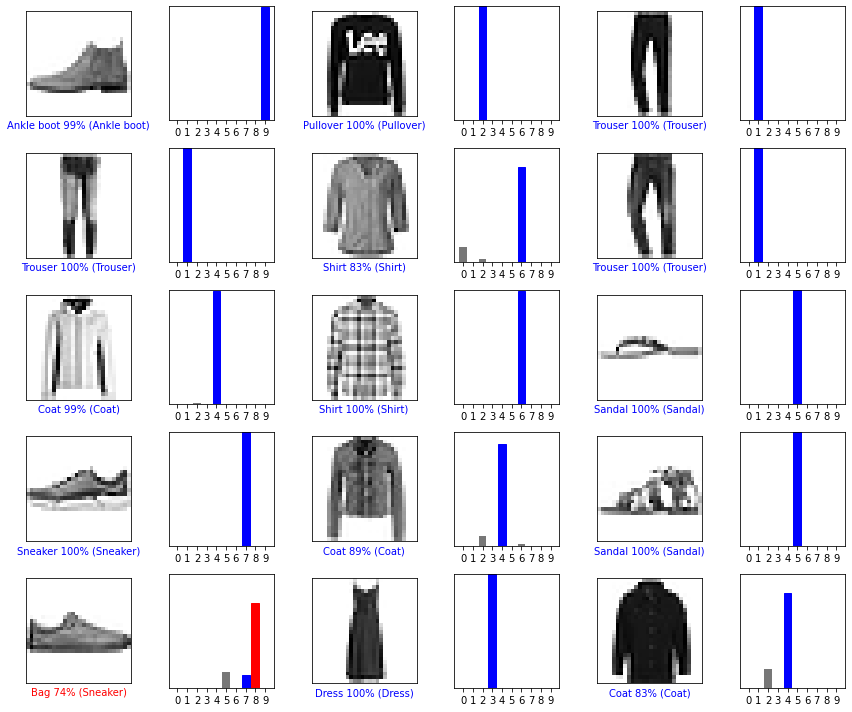

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 27ms/step
[[3.5834455e-06 2.0386188e-13 9.9974710e-01 1.8579485e-12 1.6536511e-04
  6.7532151e-13 8.3884042e-05 4.6216506e-17 3.7025712e-11 2.0455261e-15]]


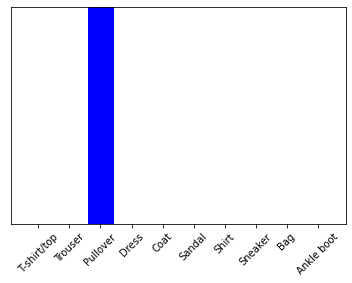

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.